<a href="https://colab.research.google.com/github/hwan2-99/machine_learning_subject/blob/main/CNN_Mnist_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 CNN을 적용한 Mnist 손글씨 인식 모델 - 데이터 증강

seed값 설정 및 데이터 불러오기

In [2]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)


11490434/11490434 [==============================] - 0s 0us/step


컨볼루션 신경망 설정

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


모델 최적화 설정

In [4]:
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = './model/{epoch:02d}-{val_loss:.4f}.hdf5'
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.3,
    zoom_range=0.1
)

모델의 실행

In [5]:
history = model.fit(datagen.flow(X_train, Y_train, batch_size=200),
                    steps_per_epoch=len(X_train) / 200,
                    validation_data=(X_test, Y_test),
                    epochs=30,
                    verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])


Epoch 1: val_loss improved from inf to 0.05581, saving model to ./model/01-0.0558.hdf5

Epoch 2: val_loss improved from 0.05581 to 0.03985, saving model to ./model/02-0.0398.hdf5

Epoch 3: val_loss improved from 0.03985 to 0.03934, saving model to ./model/03-0.0393.hdf5

Epoch 4: val_loss improved from 0.03934 to 0.03278, saving model to ./model/04-0.0328.hdf5

Epoch 5: val_loss did not improve from 0.03278

Epoch 6: val_loss improved from 0.03278 to 0.02841, saving model to ./model/06-0.0284.hdf5

Epoch 7: val_loss did not improve from 0.02841

Epoch 8: val_loss improved from 0.02841 to 0.02759, saving model to ./model/08-0.0276.hdf5

Epoch 9: val_loss improved from 0.02759 to 0.02322, saving model to ./model/09-0.0232.hdf5

Epoch 10: val_loss improved from 0.02322 to 0.02176, saving model to ./model/10-0.0218.hdf5

Epoch 11: val_loss improved from 0.02176 to 0.02117, saving model to ./model/11-0.0212.hdf5

Epoch 12: val_loss did not improve from 0.02117

Epoch 13: val_loss improved 

테스트 정확도 출력

In [6]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0161 - accuracy: 0.9944

 Test Accuracy: 0.9944


인식 정확도 = 99.44%

오차 그래프로 출력

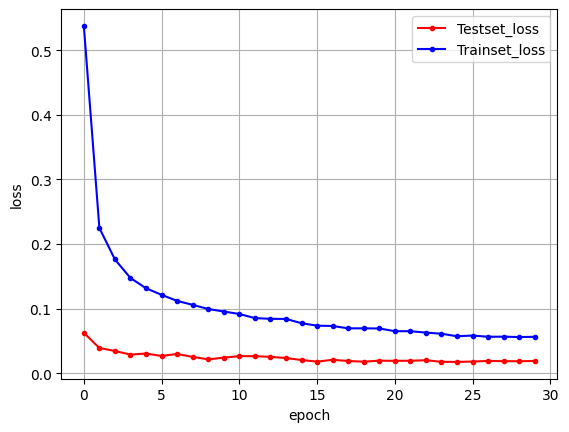

In [ ]:
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()